In [41]:
# load libaries
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.shape

(768, 9)

In [33]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [35]:
# Feature Variables 
features = df.drop('Outcome',axis=1)
# Target/Dependent Variable - Outcome
target = df['Outcome']
#Conver to Numpy array
features = np.array(features)
target = np.array(target)

Normalize

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features =scaler.fit_transform(features)

Train/Test Split

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(features,target,test_size=0.2,stratify=target)

In [40]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [39]:
x_test.shape,y_test.shape

((154, 8), (154,))

Naive Bayes Classifier

In [42]:
from sklearn.naive_bayes import GaussianNB

In [44]:
# Train the Model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [45]:
# Predict Outcome
y_pred_train =model.predict(x_train)
y_pred_test = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score

#Precision
precision_train = precision_score(y_true=y_train,y_pred=y_pred_train)
precision_test = precision_score(y_true=y_train,y_pred=y_pred_train)

#Recall
recall_train = recall_score(y_true=y_train,y_pred=y_pred_train)
recall_test = recall_score(y_true=y_train,y_pred=y_pred_train)

#ACC
acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_train,y_pred=y_pred_train)

#F1_score

f1_train = f1_score(y_true=y_train,y_pred=y_pred_train)
f1_test = f1_score(y_true=y_train,y_pred=y_pred_train)

print(f'Precision:\n Train:\n {precision_train}\n Test:\n {precision_test}\n')
print(f'Recall:\n Train:\n {recall_train}\n Test:\n {recall_test}\n')
print(f'Accuracy:\n Train:\n {acc_train}\n Test:\n {acc_test}\n')
print(f'F1 score:\n Train:\n {f1_train}\n Test:\n {f1_test}\n')


Precision:
 Train:
 0.6565656565656566
 Test:
 0.6565656565656566

Recall:
 Train:
 0.6074766355140186
 Test:
 0.6074766355140186

Accuracy:
 Train:
 0.752442996742671
 Test:
 0.752442996742671

F1 score:
 Train:
 0.6310679611650485
 Test:
 0.6310679611650485



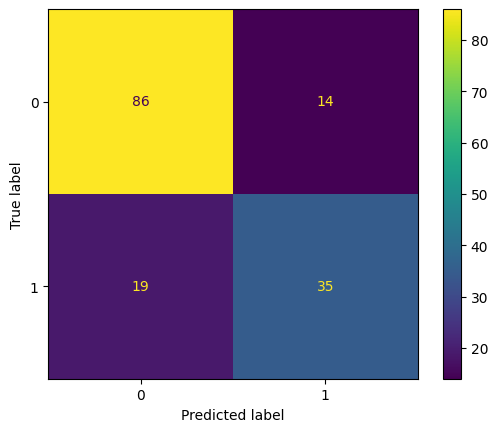

In [49]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()